In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest_android = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android1 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_2.csv')
back3 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_3.csv')
back4 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_4.csv')
back5 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_5.csv')

forward = pd.concat([forward_android1, forward_android2, forward_android3,
                     forward_android4, forward_android5])

back = pd.concat([back1, back2, back3, back4, back5])

dataDF = pd.concat([forward, back])

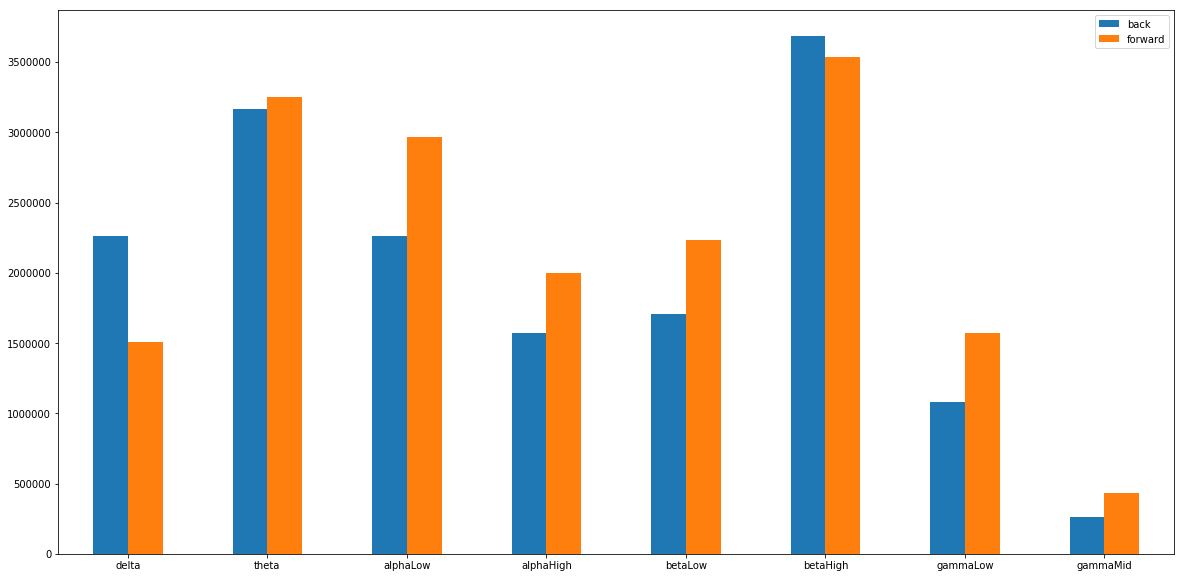

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [back.delta.mean(), back.theta.mean(), back.alphaLow.mean(), 
     back.betaHigh.mean(), back.betaLow.mean(), back.alphaHigh.mean(), 
     back.gammaLow.mean(), back.gammaMid.mean()]

d = [forward.delta.mean(), forward.theta.mean(), forward.alphaLow.mean(), 
     forward.betaHigh.mean(), forward.betaLow.mean(), forward.alphaHigh.mean(), 
     forward.gammaLow.mean(), forward.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'back': u, 'forward': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [3]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(rfc.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = RandomForestClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

[0.20389367 0.15616694 0.11025529 0.09656994 0.11201106 0.12193826
 0.09635809 0.10280676]
The score for Random Forest  0.6296296296296297
2346
Accuracy for x_test: 0.6296296296296297


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selec

Cross Validation Accuracy: 0.59 (+/- 0.23)
[0.35350318 0.39171975 0.63897764 0.67092652 0.62619808 0.69009585
 0.66453674 0.68589744 0.54487179 0.58974359]
Thresh=0.096, n=8, Accuracy: 64.24%
Thresh=0.097, n=7, Accuracy: 60.03%
Thresh=0.103, n=6, Accuracy: 63.35%
Thresh=0.110, n=5, Accuracy: 62.32%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/darrenmoriarty/

Thresh=0.112, n=4, Accuracy: 59.77%
Thresh=0.122, n=3, Accuracy: 60.41%
Thresh=0.156, n=2, Accuracy: 62.07%
Thresh=0.204, n=1, Accuracy: 57.22%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


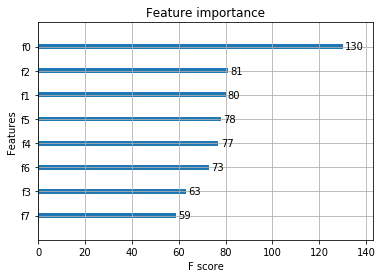

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.6475095785440613
Accuracy for x_test: 0.6475095785440613
Accuracy: 64.75%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.64 (+/- 0.33)
[0.33121019 0.34394904 0.6485623  0.77955272 0.75399361 0.78594249
 0.71246006 0.80448718 0.59294872 0.63782051]


In [5]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# plot feature importance
plot_importance(xgb)
pyplot.show()
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

In [6]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

# Model Tuning and feature importance XGBoost

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


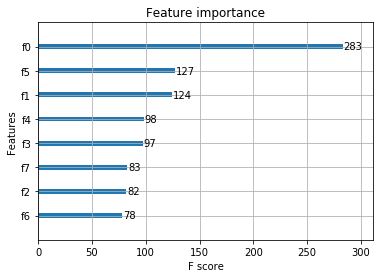

The score for XGBoost  0.6442307692307693
Accuracy for x_test: 0.6442307692307693
Accuracy: 64.42%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.65 (+/- 0.32)
[0.33757962 0.36942675 0.66453674 0.74121406 0.7827476  0.78913738
 0.7284345  0.80128205 0.6025641  0.64423077]
Thresh=0.080, n=8, Accuracy: 64.42%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

Thresh=0.084, n=7, Accuracy: 62.82%
Thresh=0.085, n=6, Accuracy: 63.14%
Thresh=0.100, n=5, Accuracy: 62.82%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

Thresh=0.101, n=4, Accuracy: 61.86%
Thresh=0.128, n=3, Accuracy: 63.14%
Thresh=0.131, n=2, Accuracy: 64.10%
Thresh=0.291, n=1, Accuracy: 63.78%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

In [21]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=2)
xgb.fit(x_train, y_train)
# plot feature importance
plot_importance(xgb)
pyplot.show()
# print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=2)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_121 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_122 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 65        
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2817/2817 [==============================] - 4s 1ms/step - loss: 0.6896 - acc: 0.5169
Epoch 2/50
2817/2817 [==============================] - 3s 985us/step - loss: 0.6856 - acc: 0.5296
Epoch 3/50
2817/2817 [==============================] - 2s 747us/step - loss

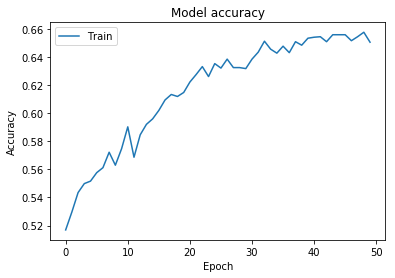

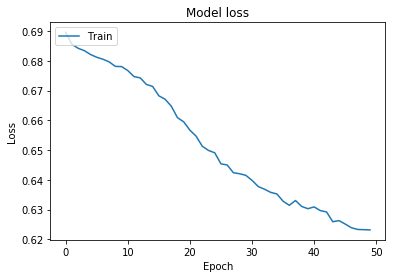

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(16, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(16, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.00038),
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=50, verbose=1, batch_size=2)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(16, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(64, activation="relu"))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.00038),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 5,425
Trainable params: 5,425
Non-trainable params: 0
_______

2252/2252 [==============================] - 2s 1ms/step - loss: 0.6490 - acc: 0.6448 - val_loss: 1.0607 - val_acc: 0.0515
Epoch 2/40
2252/2252 [==============================] - 1s 653us/step - loss: 0.6354 - acc: 0.6554 - val_loss: 1.0835 - val_acc: 0.0710
Epoch 3/40
2252/2252 [==============================] - 1s 651us/step - loss: 0.6313 - acc: 0.6607 - val_loss: 1.0986 - val_acc: 0.0746
Epoch 4/40
2252/2252 [==============================] - 1s 627us/step - loss: 0.6309 - acc: 0.6634 - val_loss: 1.0604 - val_acc: 0.0906
Epoch 5/40
2252/2252 [==============================] - 1s 660us/step - loss: 0.6294 - acc: 0.6634 - val_loss: 1.0422 - val_acc: 0.0906
Epoch 6/40
2252/2252 [==============================] - 2s 690us/step - loss: 0.6274 - acc: 0.6621 - val_loss: 1.0202 - val_acc: 0.0906
Epoch 7/40
2252/2252 [==============================] - 1s 644us/step - loss: 0.6264 - acc: 0.6612 - val_loss: 1.0681 - val_acc: 0.0906
Epoch 8/40
2252/2252 [==============================] - 1s 60

Epoch 11/40
2252/2252 [==============================] - 1s 627us/step - loss: 0.6298 - acc: 0.6532 - val_loss: 1.0809 - val_acc: 0.0993
Epoch 12/40
2252/2252 [==============================] - 1s 618us/step - loss: 0.6291 - acc: 0.6563 - val_loss: 1.0811 - val_acc: 0.0940
Epoch 13/40
2252/2252 [==============================] - 1s 651us/step - loss: 0.6250 - acc: 0.6599 - val_loss: 1.0659 - val_acc: 0.0957
Epoch 14/40
2252/2252 [==============================] - 1s 660us/step - loss: 0.6221 - acc: 0.6679 - val_loss: 0.9925 - val_acc: 0.0993
Epoch 15/40
2252/2252 [==============================] - 1s 629us/step - loss: 0.6196 - acc: 0.6612 - val_loss: 0.9042 - val_acc: 0.3599
Epoch 16/40
2252/2252 [==============================] - 1s 614us/step - loss: 0.6186 - acc: 0.6630 - val_loss: 1.0768 - val_acc: 0.0957
Epoch 17/40
2252/2252 [==============================] - 1s 596us/step - loss: 0.6182 - acc: 0.6687 - val_loss: 0.9186 - val_acc: 0.1950
Epoch 18/40
2252/2252 [==================

Epoch 21/40
2252/2252 [==============================] - 2s 853us/step - loss: 0.6354 - acc: 0.6572 - val_loss: 1.1314 - val_acc: 0.0124
Epoch 22/40
2252/2252 [==============================] - 2s 794us/step - loss: 0.6343 - acc: 0.6563 - val_loss: 1.0776 - val_acc: 0.0124
Epoch 23/40
2252/2252 [==============================] - 2s 735us/step - loss: 0.6337 - acc: 0.6585 - val_loss: 1.0736 - val_acc: 0.0124
Epoch 24/40
2252/2252 [==============================] - 2s 859us/step - loss: 0.6322 - acc: 0.6563 - val_loss: 1.0610 - val_acc: 0.0142
Epoch 25/40
2252/2252 [==============================] - 2s 838us/step - loss: 0.6306 - acc: 0.6554 - val_loss: 1.0646 - val_acc: 0.0230
Epoch 26/40
2252/2252 [==============================] - 2s 876us/step - loss: 0.6294 - acc: 0.6563 - val_loss: 0.9817 - val_acc: 0.0230
Epoch 27/40
2252/2252 [==============================] - 2s 882us/step - loss: 0.6281 - acc: 0.6545 - val_loss: 0.9654 - val_acc: 0.0940
Epoch 28/40
2252/2252 [==================

Epoch 31/40
2252/2252 [==============================] - 2s 752us/step - loss: 0.6225 - acc: 0.6581 - val_loss: 0.9373 - val_acc: 0.1152
Epoch 32/40
2252/2252 [==============================] - 2s 791us/step - loss: 0.6230 - acc: 0.6607 - val_loss: 1.0909 - val_acc: 0.1011
Epoch 33/40
2252/2252 [==============================] - 2s 759us/step - loss: 0.6223 - acc: 0.6652 - val_loss: 0.9495 - val_acc: 0.2234
Epoch 34/40
2252/2252 [==============================] - 2s 738us/step - loss: 0.6193 - acc: 0.6674 - val_loss: 1.1458 - val_acc: 0.1028
Epoch 35/40
2252/2252 [==============================] - 2s 760us/step - loss: 0.6198 - acc: 0.6599 - val_loss: 0.9363 - val_acc: 0.1401
Epoch 36/40
2252/2252 [==============================] - 2s 788us/step - loss: 0.6211 - acc: 0.6572 - val_loss: 1.0061 - val_acc: 0.1152
Epoch 37/40
2252/2252 [==============================] - 2s 776us/step - loss: 0.6180 - acc: 0.6630 - val_loss: 0.9855 - val_acc: 0.2411
Epoch 38/40
2252/2252 [==================

313/313 [==============================] - 0s 35us/step
Average accuracy of model on the dev set =  0.5868979059302528
Training on fold 7/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_50 (Dense)      

2253/2253 [==============================] - 3s 1ms/step - loss: 0.6507 - acc: 0.6440 - val_loss: 1.0625 - val_acc: 0.0000e+00
Epoch 2/40
2253/2253 [==============================] - 1s 619us/step - loss: 0.6471 - acc: 0.6436 - val_loss: 1.0394 - val_acc: 0.0000e+00
Epoch 3/40
2253/2253 [==============================] - 2s 668us/step - loss: 0.6441 - acc: 0.6431 - val_loss: 0.9738 - val_acc: 0.1011
Epoch 4/40
2253/2253 [==============================] - 1s 614us/step - loss: 0.6424 - acc: 0.6502 - val_loss: 1.0481 - val_acc: 0.0957
Epoch 5/40
2253/2253 [==============================] - 1s 643us/step - loss: 0.6412 - acc: 0.6489 - val_loss: 1.0937 - val_acc: 0.0993
Epoch 6/40
2253/2253 [==============================] - 1s 633us/step - loss: 0.6403 - acc: 0.6525 - val_loss: 1.0639 - val_acc: 0.1011
Epoch 7/40
2253/2253 [==============================] - 2s 685us/step - loss: 0.6384 - acc: 0.6511 - val_loss: 1.0646 - val_acc: 0.0904
Epoch 8/40
2253/2253 [==============================]

2253/2253 [==============================] - 1s 648us/step - loss: 0.6430 - acc: 0.6511 - val_loss: 1.0230 - val_acc: 0.0887
Epoch 12/40
2253/2253 [==============================] - 1s 648us/step - loss: 0.6411 - acc: 0.6516 - val_loss: 0.9787 - val_acc: 0.0904
Epoch 13/40
2253/2253 [==============================] - 1s 620us/step - loss: 0.6414 - acc: 0.6494 - val_loss: 1.0678 - val_acc: 0.0887
Epoch 14/40
2253/2253 [==============================] - 2s 667us/step - loss: 0.6413 - acc: 0.6529 - val_loss: 0.9228 - val_acc: 0.0975
Epoch 15/40
2253/2253 [==============================] - 1s 637us/step - loss: 0.6413 - acc: 0.6520 - val_loss: 0.9942 - val_acc: 0.0904
Epoch 16/40
2253/2253 [==============================] - 1s 616us/step - loss: 0.6395 - acc: 0.6511 - val_loss: 1.0723 - val_acc: 0.0727
Epoch 17/40
2253/2253 [==============================] - 2s 680us/step - loss: 0.6394 - acc: 0.6520 - val_loss: 0.9729 - val_acc: 0.0922
Epoch 18/40
2253/2253 [==============================

2253/2253 [==============================] - 2s 753us/step - loss: 0.6242 - acc: 0.6605 - val_loss: 0.9758 - val_acc: 0.0904
Epoch 22/40
2253/2253 [==============================] - 2s 674us/step - loss: 0.6231 - acc: 0.6618 - val_loss: 1.0375 - val_acc: 0.2447
Epoch 23/40
2253/2253 [==============================] - 2s 781us/step - loss: 0.6220 - acc: 0.6640 - val_loss: 1.0012 - val_acc: 0.0922
Epoch 24/40
2253/2253 [==============================] - 2s 730us/step - loss: 0.6214 - acc: 0.6618 - val_loss: 0.9891 - val_acc: 0.1933
Epoch 25/40
2253/2253 [==============================] - 2s 696us/step - loss: 0.6186 - acc: 0.6693 - val_loss: 0.8716 - val_acc: 0.2837
Epoch 26/40
2253/2253 [==============================] - 2s 669us/step - loss: 0.6181 - acc: 0.6618 - val_loss: 0.7652 - val_acc: 0.5355
Epoch 27/40
2253/2253 [==============================] - 2s 683us/step - loss: 0.6167 - acc: 0.6627 - val_loss: 0.9682 - val_acc: 0.1844
Epoch 28/40
2253/2253 [==============================